In [1]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1frBTU29ymCy9Cv6ojhFZtexgTP54pG0A"})   # replace the id with id of file you want to access
downloaded.GetContentFile('spam.csv')        # replace the file name with your file


In [2]:
import pandas as pd
import numpy as np
import string

#import the data file
filename = 'spam.csv' 

df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#Remove the unwanted columns
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Print number of records
L = len(df_sms)
print(L)
#Example of accessing a column in pandas dataframe
df_sms.sms

5572


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object

In [5]:
#Define a Function to convert sms text to Lower case and remove stop words, punctuation and numbers

def preprocess_Text(input_Text):
  input_Text = input_Text.lower();
  stopwords = ['the','what','is','a','an','of', 'that']
  querywords = input_Text.split()

  resultwords  = [word for word in querywords if word not in stopwords]
  result = ' '.join(resultwords)

  exclude = set(string.punctuation)
  result = ''.join(ch for ch in result if ch not in exclude)

  exclude = set('0123456789')
  result = ''.join(ch for ch in result if ch not in exclude)

  return result;
  

In [6]:
#Test the preprocessing funtion
preprocess_Text('Hello, where4 is he.')

'hello where he'

In [7]:
#Preprocess all the sms texts
L = len(df_sms)
for i in range(0,L-1):
  df_sms['sms'][i] = preprocess_Text(df_sms['sms'][i])

In [8]:
#check if preprocessing was applied correctly by looking at any sms
df_sms['sms'][5]

'freemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send å£ to rcv'

In [9]:
#Divide the dataframes into training and and testing set
from sklearn.utils import shuffle
df_sms = shuffle(df_sms)
training_Subset = df_sms.iloc[:round(len(df_sms)*0.9),:]   #90% data into training
test_Subset = df_sms.iloc[round(len(df_sms)*0.9):,:]       #10% data into testing
spam_Subset = training_Subset.query('label == "spam"')
ham_Subset = training_Subset.query('label == "ham"');

In [10]:
spam_Subset['sms'].iloc[5]

'splashmobile choose from s gr tones each wk this subscrition service with weekly tones costing p u have one credit  kick back and enjoy'

In [11]:
#combine all text into one large paragraph which shall be used to list unique words
L = len(training_Subset);
all_Text = ""
for i in training_Subset.index:
  all_Text = all_Text + " "+training_Subset['sms'][i];


In [12]:
all_Text

' thanx  sending me home ha ha nan yalrigu heltiniiyo kothi chikku u shared many things wit meso far i didnt told any body and even uttered word abt u if ur trusting me so much how can i tell these to others plz nxt time dont use those words to meok chikkub free for st week no nokia tone  ur mobile every week just txt nokia to  get txting and tell ur mates wwwgetzedcouk pobox  wwq  normptone tmrw im finishing  doors ill talk to others and probably just come early tomorrow then well you pay over like ltgt yrs so its not too difficult every day i use to sleep after ltgt so only its cool we can last little while getting more any time soon to think no one saying clearly ok leave no need to ask her i will go if she come or not private your  account statement for fone no shows  unredeemed s i m points call  identifier code  expires  why dont you wait til at least wednesday to see if you get your  got c i lazy to type i forgot ì in lect i saw pouch but like not v nice any way where are you an

In [13]:
#make a table with all unique words
allWords = all_Text.split()

row_Names = [] 
for i in allWords:
      if not i in row_Names:
          row_Names.append(i);
print(row_Names)

['thanx', 'sending', 'me', 'home', 'ha', 'nan', 'yalrigu', 'heltiniiyo', 'kothi', 'chikku', 'u', 'shared', 'many', 'things', 'wit', 'meso', 'far', 'i', 'didnt', 'told', 'any', 'body', 'and', 'even', 'uttered', 'word', 'abt', 'if', 'ur', 'trusting', 'so', 'much', 'how', 'can', 'tell', 'these', 'to', 'others', 'plz', 'nxt', 'time', 'dont', 'use', 'those', 'words', 'meok', 'chikkub', 'free', 'for', 'st', 'week', 'no', 'nokia', 'tone', 'mobile', 'every', 'just', 'txt', 'get', 'txting', 'mates', 'wwwgetzedcouk', 'pobox', 'wwq', 'normptone', 'tmrw', 'im', 'finishing', 'doors', 'ill', 'talk', 'probably', 'come', 'early', 'tomorrow', 'then', 'well', 'you', 'pay', 'over', 'like', 'ltgt', 'yrs', 'its', 'not', 'too', 'difficult', 'day', 'sleep', 'after', 'only', 'cool', 'we', 'last', 'little', 'while', 'getting', 'more', 'soon', 'think', 'one', 'saying', 'clearly', 'ok', 'leave', 'need', 'ask', 'her', 'will', 'go', 'she', 'or', 'private', 'your', 'account', 'statement', 'fone', 'shows', 'unredeem

In [14]:
#For each word find inspam probability [P(word|spam)] and in-ham probability [P(word|ham)]
word = '';
inSpamCount = 0;
inHamCount = 0;
columns = ['inSpamProbability','inHamProbability']
probability_Table = pd.DataFrame(index=row_Names, columns=columns)
for word in row_Names:
  inSpamCount = 0;
  inHamCount = 0;
  for i in spam_Subset['sms']:
    if(i.find(word)!=-1):
      inSpamCount = inSpamCount+1;
  for i in ham_Subset['sms']:
    if(i.find(word)!=-1):
      inHamCount = inHamCount+1;
  probability_Table.at[word, 'inSpamProbability'] = (1+inSpamCount)/(len(spam_Subset)); #1 is added so that no word has probability of zero
  probability_Table.at[word,'inHamProbability'] = (1+inHamCount)/(len(ham_Subset));


In [15]:
probability_Table.sort_values("inSpamProbability", axis = 0, ascending = False, 
                 inplace = True, na_position ='first') 

In [16]:
probability_Table

,inSpamProbability,inHamProbability
e,1,0.946752
o,1,0.945375
n,0.993921,0.903833
t,0.989362,0.912325
s,0.989362,0.827404
...,...,...
yijuehotmailcom,0.00151976,0.000459031
haul,0.00151976,0.000459031
donewant,0.00151976,0.000459031
patty,0.00151976,0.000688547



#Assignment 1

1.1 Write a code to determine if a msg is spam or ham (1)
               def check_msg(test_Msg):
                ............
                ..........
1.2 Write a code to test all messages in both training and test data and determine the Accuracy for both (1)


In [17]:
#function to detect spam or ham sms using naive bayes
def check_msg(test_msg):
  spamProb=1
  hamProb=1
  for i in test_msg:
    for j in range(len(probability_Table)):
      if i==probability_Table.index[j]:
        spamProb=spamProb*probability_Table.inSpamProbability[j] 
        hamProb=hamProb*probability_Table.inHamProbability[j]
  if spamProb >=hamProb:
    return 'spam'
  else:
    return 'ham'

In [18]:
test_Subset=test_Subset.reset_index(drop=True) #reseting the index of the test subset
test_Subset # with sorted index numbering

,label,sms
0,ham,alright i have new goal now
1,ham,japanese proverb if one can do it u too can do...
2,ham,or ì go buy wif him then i meet ì later can
3,ham,yun ahthe ubi one say if ì wan call by tomorro...
4,ham,im gonna be home soon and i dont want to talk ...
...,...,...
552,ham,hurry up ive been weeddeficient for like three...
553,ham,i am literally in bed and have been up for lik...
554,ham,smile in pleasure smile in pain smile when tro...
555,ham,ìï bot notes oredi cos i juz rem i got


In [19]:
#Calculation of True positive rate,True negative rate,False positive rate,False negative rate,Accuracy,Error_Rate

ac=0;
tp=0
tn=0
fp=0
fn=0

for i in range(len(test_Subset)):
  if check_msg(test_Subset['sms'][i])==test_Subset['label'][i]:
    ac=ac+1;
  if test_Subset['label'][i]=='ham' and check_msg(test_Subset['sms'][i])=='ham': #condition for true positive
    tp=tp+1;
  if test_Subset['label'][i]=='ham' and check_msg(test_Subset['sms'][i])=='spam': #condition for false negative
    fn=fn+1; 
  if test_Subset['label'][i]=='spam' and check_msg(test_Subset['sms'][i])=='ham': #condition for false positive
    fp=fp+1;
  if test_Subset['label'][i]=='spam' and check_msg(test_Subset['sms'][i])=='spam': #condition for true negative
    tn=tn+1;
accuracy=ac/len(test_Subset)*100
truePositive=tp/len(test_Subset)*100
falseNegative=fn/len(test_Subset)*100
falsePositive=fp/len(test_Subset)*100
trueNegative=tn/len(test_Subset)*100
print ("Accuracy: ", accuracy,'%')
print ("True Positive: ",truePositive)
print ("True Negative: ",trueNegative)
print ("False Positive: ",falsePositive)
print ("False Negative: ",falseNegative)
print ("Error Rate: ",100-accuracy)

Accuracy:  16.337522441651707 %
True Positive:  0.3590664272890485
True Negative:  15.978456014362658
False Positive:  0.0
False Negative:  83.66247755834829
Error Rate:  83.66247755834829


#Gaussian Naive Bayes

In [20]:
#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1NHWj0q0xFW0ieb2cGP-gbwEjjOE3IRmU"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Iris.csv')        # replace the file name with your file

In [21]:
I = pd.read_csv('Iris.csv')
I

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
I = shuffle(I)

In [23]:
# store the feature matrix (X) and response vector (y) 
X = I.drop(['Species', 'Id'], axis =1)
y = I['Species'] 
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [24]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.4,3.4,1.7,0.2
1,5.1,3.4,1.5,0.2
2,5.0,2.0,3.5,1.0
3,5.1,3.5,1.4,0.3
4,5.1,3.3,1.7,0.5
...,...,...,...,...
115,5.4,3.9,1.7,0.4
116,6.3,2.8,5.1,1.5
117,6.8,2.8,4.8,1.4
118,5.9,3.0,4.2,1.5


In [25]:
indices_versicolor = [i for i, x in enumerate(y_train.to_list()) if x == 'Iris-versicolor']
indices_setosa = [i for i, x in enumerate(y_train.to_list()) if x == 'Iris-setosa']
indices_virginica = [i for i, x in enumerate(y_train.to_list()) if x == 'Iris-virginica']

In [26]:
print(X_train.iloc[indices_versicolor])
print(y_train.iloc[indices_versicolor])

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
2              5.0           2.0            3.5           1.0
5              5.5           2.4            3.7           1.0
8              5.8           2.7            4.1           1.0
14             6.6           2.9            4.6           1.3
16             5.1           2.5            3.0           1.1
17             5.0           2.3            3.3           1.0
19             6.3           2.3            4.4           1.3
30             5.7           2.8            4.1           1.3
32             6.9           3.1            4.9           1.5
35             6.6           3.0            4.4           1.4
38             5.6           2.7            4.2           1.3
40             6.7           3.1            4.7           1.5
41             6.2           2.2            4.5           1.5
46             5.4           3.0            4.5           1.5
48             5.2           2.7            3.9           1.4
49      

In [27]:
Dim_Global_Means = X_train.mean(axis = 0)
Dim_Global_Std = X_train.std(axis = 0)

In [28]:
Dim_Global_Means.SepalLengthCm	

5.8216666666666645

In [29]:
Dim_Global_Std.SepalLengthCm

0.8496349520945616

In [30]:
Dim_versicolor_Means = X_train.iloc[indices_versicolor].mean(axis = 0)
Dim_versicolor_Std = X_train.iloc[indices_versicolor].std(axis = 0)

Dim_setosa_Means = X_train.iloc[indices_setosa].mean(axis = 0)
Dim_setosa_Std = X_train.iloc[indices_setosa].std(axis = 0)

Dim_virginica_Means = X_train.iloc[indices_virginica].mean(axis = 0)
Dim_virginica_Std = X_train.iloc[indices_virginica].std(axis = 0)

In [31]:
import matplotlib.pyplot as plt

In [32]:
def plot_Normal_Distribution(mu,sigma, colr):
  Distribution = np.random.normal(mu, sigma, 1000)
  count, bins, ignored = plt.hist(Distribution, 30, density=True, color = 'white')
  plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( -(bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color=colr)

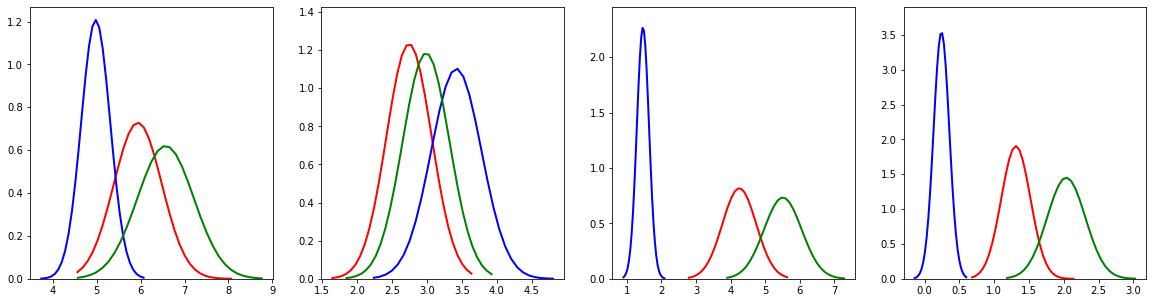

In [33]:
plt.figure(figsize = [20, 5])
plt.subplot(1,4,1)
plot_Normal_Distribution(Dim_versicolor_Means.SepalLengthCm, Dim_versicolor_Std.SepalLengthCm, 'r')
plot_Normal_Distribution(Dim_setosa_Means.SepalLengthCm, Dim_setosa_Std.SepalLengthCm, 'b')
plot_Normal_Distribution(Dim_virginica_Means.SepalLengthCm, Dim_virginica_Std.SepalLengthCm, 'g')
plt.subplot(1,4,2)
plot_Normal_Distribution(Dim_versicolor_Means.SepalWidthCm , Dim_versicolor_Std.SepalWidthCm , 'r')
plot_Normal_Distribution(Dim_setosa_Means.SepalWidthCm, Dim_setosa_Std.SepalWidthCm, 'b')
plot_Normal_Distribution(Dim_virginica_Means.SepalWidthCm, Dim_virginica_Std.SepalWidthCm, 'g')
plt.subplot(1,4,3)
plot_Normal_Distribution(Dim_versicolor_Means.PetalLengthCm , Dim_versicolor_Std.PetalLengthCm , 'r')
plot_Normal_Distribution(Dim_setosa_Means.PetalLengthCm, Dim_setosa_Std.PetalLengthCm, 'b')
plot_Normal_Distribution(Dim_virginica_Means.PetalLengthCm, Dim_virginica_Std.PetalLengthCm, 'g')
plt.subplot(1,4,4)
plot_Normal_Distribution(Dim_versicolor_Means.PetalWidthCm , Dim_versicolor_Std.PetalWidthCm , 'r')
plot_Normal_Distribution(Dim_setosa_Means.PetalWidthCm, Dim_setosa_Std.PetalWidthCm, 'b')
plot_Normal_Distribution(Dim_virginica_Means.PetalWidthCm, Dim_virginica_Std.PetalWidthCm, 'g')


#Assignment 2

2.1 Write a function to determine whcich class a flower belongs to once four the measurements of petal and sepal are given.  (1)

2.2 Write a code to predict the correct class of all training and test data and determine the Accuracy for both (1)


In [34]:
import numpy
x_train=X_train.to_numpy()

In [35]:
y_pred=[]
y_true=[]
def check_flower(x):
  for i in range(len(x)):
    prob_versicolor_sl=1.0
    prob_setosa_sl1=1.0
    prob_virginica_sl1=1.0
    for j in range(4):
      prob_versicolor_sl=calculate_probability(x[i][j],Dim_versicolor_Means[j],Dim_versicolor_Std[j])*prob_versicolor_sl(len(X_train.iloc[indices_versicolor]))/(len(X_train))
      prob_setosa_sl1=calculate_probability(x[i][j],Dim_setosa_Means[j],Dim_setosa_Std[j])*prob_setosa_sl1(len(X_train.iloc[indices_setosa]))/(len(X_train))
      prob_virginica_sl1=calculate_probability(x[i][j],Dim_virginica_Means[j],Dim_virginica_Std[j])*prob_virginica_sl1(len(X_train.iloc[indices_virginica ]))/(len(X_train))
      maxe=max(prob_versicolor_sl,prob_setosa_sl1,prob_virginica_sl1)
      if (maxee==prob_versicolor_sl11):
        print('versicolor')
        result='Iris-versicolor'
        #return 'versicolor'
      elif (maxee==prob_setosa_sl12):
        result='Iris-seotosa'
        #return 'seotosa'
      else:
        result='Iris-virginica'
        #return 'verginica'
    y_pred.append(result)
    y_true.append(y_train[i])
  print(accuracy_score(y_true, y_pred))

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.9466666666666667